# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import graphviz

# Data Load

In [2]:
df = pd.read_csv('raw_data/datascientist_data_step4_features.csv')
df.head()

,Location State_ CA,Location State_ NY,Location City_San Diego,Founded,Location City_Los Angeles,Job Title_Data Scientist,Job Title_Data Analyst,Job Title_Data Engineer,Location City_Austin,Location City_Burbank,...,Rating_3,Sector_Business Services,Sector_Unknown,Type of ownership_Company - Private,Revenue_$100 to $500 million (USD),Rating_4,Revenue_$10+ billion (USD),"Headquarters_Chicago, IL",Location State_ IL,Est_Salary
0,0,1,0,2007,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,146.0
1,0,1,0,2008,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,146.0
2,0,1,0,1976,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,146.0
3,0,0,0,2019,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,146.0
4,0,1,0,2007,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,146.0


# Train-Test Split

Training and Test Datasets
When fitting models, we would like to ensure two things:

We have found the best model (in terms of model parameters).
The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets
We built our model with the requirement that the model fit the data well.
As a side-effect, the model will fit THIS dataset well. What about new data?
We wanted the model for predictions, right?
One simple solution, leave out some data (for testing) and train the model on the rest

In [3]:
y = df['Est_Salary']
X = df.drop(['Est_Salary'],axis=1, inplace=False)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)    
X_train.head()

,Location State_ CA,Location State_ NY,Location City_San Diego,Founded,Location City_Los Angeles,Job Title_Data Scientist,Job Title_Data Analyst,Job Title_Data Engineer,Location City_Austin,Location City_Burbank,...,Type of ownership_Company - Public,Rating_3,Sector_Business Services,Sector_Unknown,Type of ownership_Company - Private,Revenue_$100 to $500 million (USD),Rating_4,Revenue_$10+ billion (USD),"Headquarters_Chicago, IL",Location State_ IL
3485,0,0,0,1983,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
1456,0,0,0,1983,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2912,1,0,0,2014,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1081,0,0,0,1976,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
568,1,0,0,1979,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
X_train.shape, X_test.shape

((3127, 25), (782, 25))

In [6]:
y_train.shape,y_test.shape

((3127,), (782,))

# Use K Fold cross validation to measure accuracy of our Linear Regression model

Tuning the Model
The model has some hyperparameters we can tune for hopefully better performance. For tuning the parameters of model, i m using mix of cross-validation and grid search. In Logistic Regression, the most important parameter to tune is the regularization parameter C. Note that the regularization parameter is not always part of the logistic regression model.

The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection.

Now implement some code to perform model tuning and selecting the regularization parameter $C$.

We use the following cv_score function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.3806842 , 0.33628592, 0.35909302, 0.28620002, 0.37204797,
       0.35228094, 0.30227338, 0.37977985, 0.31795785, 0.35919366])

## Ridge Regression

In [8]:
# define model
ridge = Ridge(alpha=1.0, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
#ridge.score(X_test, y_test)
#accuracy
accuracy = ridge.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = ridge.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  22.533646460681556 %

Test Data Accuracy:-  24.502296097464914 %


Ridge Regression gives us accuracy of 24% on test data

In [9]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    predction -- the predicted values
    What exactly does ‘ERROR’ in this metric mean ?
    Prediction Error => Actual Value - Predicted Value
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [10]:
mae(y_test,ridge_pred )

27.689620526451304

#### Mean absolute percentage Accuracy (MAPE)

In [11]:
errors = abs(ridge_pred - y_test)

In [12]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy (MAPE):', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy (MAPE): 69.77 %.
Mean absolute percentage error (MAPE): 30.23 %.


### Mean Squared Error

In [13]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,ridge_pred)
print(MSE)

1102.9469620650489


To convert this back to our measurement space, we often take the square root, to form the root mean square error:

In [14]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 33.21064531238514


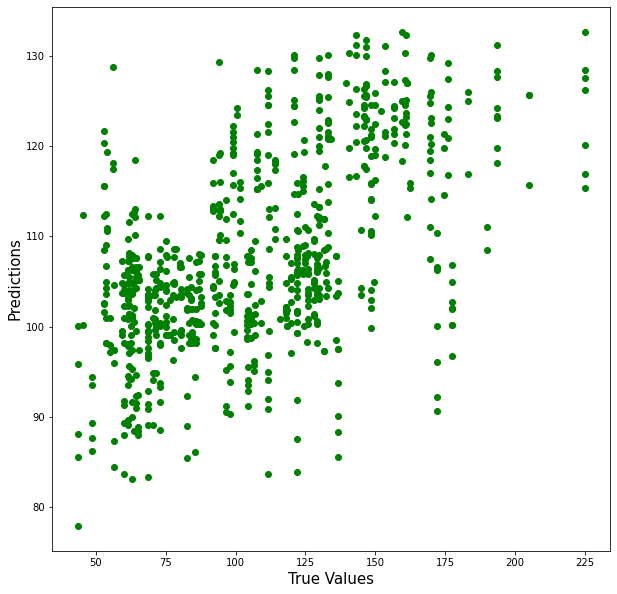

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ridge_pred, c='green')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
plt.show()

In [16]:
residuals = y_test-ridge_pred

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


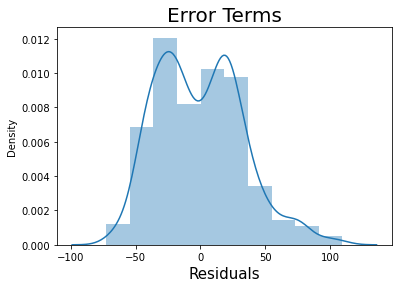

In [17]:
sns.distplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

## Lasso Regression

In [18]:
#define model
lasso = Lasso(alpha=0.1, normalize=True)
#fit the model
lasso.fit(X_train, y_train)
#make a prediction
lasso_pred = lasso.predict(X_test)

#check accuracy
accuracy = lasso.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = lasso.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  18.566478238499595 %

Test Data Accuracy:-  20.83905470092936 %


In [19]:
mae(y_test,lasso_pred )

28.49404288864112

#### Mean absolute percentage Accuracy (MAPE)

In [20]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(lasso_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy (MAPE):', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy (MAPE): 68.96 %.
Mean absolute percentage error (MAPE): 31.04 %.


### Mean squared error

In [21]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,lasso_pred)

print(MSE)

1156.4633044274044


In [22]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 34.00681261787709


In [23]:
residuals = y_test-lasso_pred

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


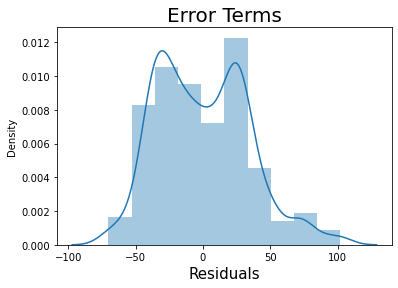

In [24]:
sns.distplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

# OLS 

In [25]:
#Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     65.06
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          2.12e-261
Time:                        00:31:34   Log-Likelihood:                -15188.
No. Observations:                3127   AIC:                         3.043e+04
Df Residuals:                    3101   BIC:                         3.058e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [26]:
# Run regression using statsmodels
import statsmodels.api as sm

X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     20.32
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           4.73e-68
Time:                        00:31:34   Log-Likelihood:                -3757.8
No. Observations:                 782   AIC:                             7568.
Df Residuals:                     756   BIC:                             7689.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Linear Regression:

Split the data into a training and test (hold-out) set
Train on the training set, and test for accuracy on the testing set

In [27]:
# train using Linear model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

#accuracy
accuracy = model.score(X_train,y_train)
print('\nModel Accuracy:- ', accuracy*100,'%')

accuracy = model.score(X_test,y_test)
print('\nTest Data Accuracy:- ', accuracy*100,'%')


Model Accuracy:-  34.4034392444439 %

Test Data Accuracy:-  36.74499719562149 %


In [28]:
y_pred = model.predict(X_test)

### MAE

In [29]:
# Use the forest's predict method on the test data
linear_pred = model.predict(X_test)#y_pred
# Calculate the absolute errors
errors = abs(linear_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 24.74


### MAPE

In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy (MAPE):', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy (MAPE): 73.3 %.
Mean absolute percentage error (MAPE): 26.7 %.


### MSE

In [31]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,linear_pred)

print(MSE)

924.0931786292745


In [32]:
print('Mean Squared Error',np.sqrt(MSE))

Mean Squared Error 30.39890094443012


In [33]:
residuals = y_test-linear_pred

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


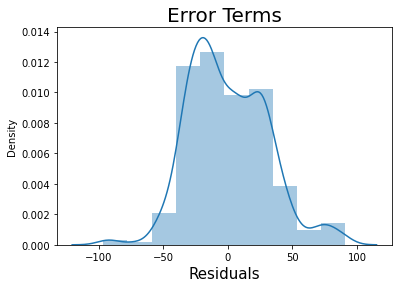

In [34]:
sns.distplot(residuals, bins = 10) #histplot
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

In [35]:
# Collect 3 Random Samples for prediction; from unseen data
Sample_X_test = X_test.sample(n=3, random_state=2)
#prediction for 3 samples
pred = model.predict(Sample_X_test)
Sample_X_test
#pred

,const,Location State_ CA,Location State_ NY,Location City_San Diego,Founded,Location City_Los Angeles,Job Title_Data Scientist,Job Title_Data Analyst,Job Title_Data Engineer,Location City_Austin,...,Type of ownership_Company - Public,Rating_3,Sector_Business Services,Sector_Unknown,Type of ownership_Company - Private,Revenue_$100 to $500 million (USD),Rating_4,Revenue_$10+ billion (USD),"Headquarters_Chicago, IL",Location State_ IL
1334,1.0,0,0,0,1994,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3735,1.0,0,0,0,2012,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
116,1.0,0,1,0,2009,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
print("Featured 3 sample data used for prediction")
pd.DataFrame({'First Sample' : df.iloc[1334],
              'Second Sample' : df.iloc[3735],
              'Third Sample' : df.iloc[116]}).T


Featured 3 sample data used for prediction


,Location State_ CA,Location State_ NY,Location City_San Diego,Founded,Location City_Los Angeles,Job Title_Data Scientist,Job Title_Data Analyst,Job Title_Data Engineer,Location City_Austin,Location City_Burbank,...,Rating_3,Sector_Business Services,Sector_Unknown,Type of ownership_Company - Private,Revenue_$100 to $500 million (USD),Rating_4,Revenue_$10+ billion (USD),"Headquarters_Chicago, IL",Location State_ IL,Est_Salary
First Sample,0.0,0.0,0.0,1994.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,128.0
Second Sample,0.0,0.0,0.0,2012.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,131.5
Third Sample,0.0,1.0,0.0,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.5


In [37]:
Sample_Y_test = y_test.sample(n=3, random_state=2)
Sample_Y_test

1334    128.0
3735    131.5
116     111.5
Name: Est_Salary, dtype: float64

# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
print("\n1. Safe Model Confusion Matrix for Training Data :- \n")
pd.crosstab(Sample_Y_test,pred)


1. Safe Model Confusion Matrix for Training Data :- 



col_0,96.408077,102.119175,140.157273
Est_Salary,,,
111.5,0,0,1
128.0,0,1,0
131.5,1,0,0


After review the confusion matrix if avg salary is 111 but model predict it 96, if avg salary is 131 but model predict it 140

Convert random sample to user readable

In [39]:
# Collect 3 Random Samples for prediction; from unseen data
pred1 = X_test.sample(n=3, random_state=2)
print("Creating three random sample from dataset")
print("\nBelow test data is unseen by Model during it's training")
pred1

Creating three random sample from dataset

Below test data is unseen by Model during it's training


,const,Location State_ CA,Location State_ NY,Location City_San Diego,Founded,Location City_Los Angeles,Job Title_Data Scientist,Job Title_Data Analyst,Job Title_Data Engineer,Location City_Austin,...,Type of ownership_Company - Public,Rating_3,Sector_Business Services,Sector_Unknown,Type of ownership_Company - Private,Revenue_$100 to $500 million (USD),Rating_4,Revenue_$10+ billion (USD),"Headquarters_Chicago, IL",Location State_ IL
1334,1.0,0,0,0,1994,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3735,1.0,0,0,0,2012,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
116,1.0,0,1,0,2009,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
